<a href="https://colab.research.google.com/github/Chigaga/space_weather/blob/main/Sunspots_magnetic_field_and_temperature_sctructure_Part_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Assignment 5

In [ ]:
! pip install sunpy
! pip install astropy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Sunspots - magnetic field and temperature sctructure. Part 1

#### Step 1

In [ ]:
import numpy as np
import pandas as pd
import glob
#%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import datetime
import xarray 
from astropy.timeseries import LombScargle
import math
#import seaborn as sns
from astropy.io import fits
from scipy import ndimage, misc
import math
from astropy.time import Time
from astropy.nddata import Cutout2D
from astropy import units as u
import sys

In [ ]:
cont = '/content/drive/MyDrive/Skoltech/Space_Weather_assignments/Assignment5/1.fits'
magn = '/content/drive/MyDrive/Skoltech/Space_Weather_assignments/Assignment5/2.fits'

In [ ]:
def getdata(filename):
    hdulist = fits.open(filename)
    hdu = hdulist[0]

    image_data = hdu.data
    image_data_ud = np.flipud(image_data)
    rotated = image_data_ud
    return rotated

def cutting(data):
    position = (2415, 2320)
    size = (150, 150)
    cutout = Cutout2D(data, position, size)
    return cutout

In [ ]:
filename = magn

In [ ]:
hdulist = fits.open(filename)
hdu = hdulist[0]
image_data = hdu.data
image_data_ud = np.flipud(image_data)
rotated = image_data_ud


In [ ]:

plt.figure()
#plt.vlines(2420, 0, 4000, alpha = 0.4, color = 'red')
#plt.hlines(2320, 0, 4000, alpha = 0.4, color = 'red')
#plt.imshow(rotated, cmap='gray')
plt.imshow(rotated, cmap='gray', vmin=-1500, vmax=1500)
plt.legend()
plt.colorbar()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 7)
#plt.savefig('cont',dpi=300)
plt.show()

#### Step 2

In [ ]:
position = (2415, 2320)
size = (150, 150)
cutout = Cutout2D(rotated, position, size)

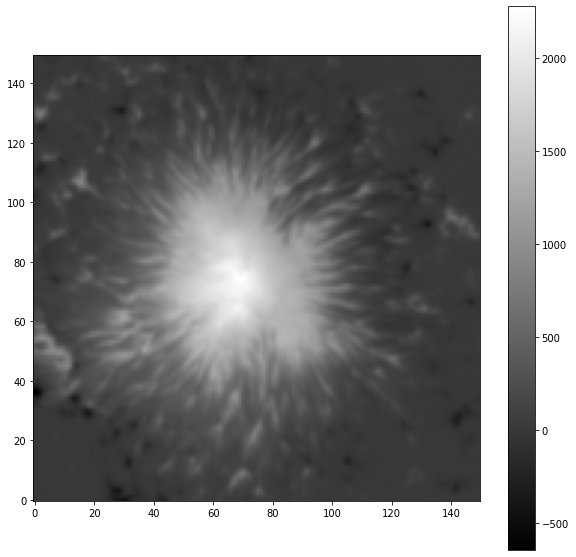

In [ ]:
plt.imshow(cutout.data, origin='lower', cmap='gray')
fig = matplotlib.pyplot.gcf()
#plt.vlines(70,15, 135, alpha = 0.4, color = 'red')
#plt.hlines(2320, 0, 4000, alpha = 0.4, color = 'red')
fig.set_size_inches(10, 10)
plt.colorbar()
plt.show()

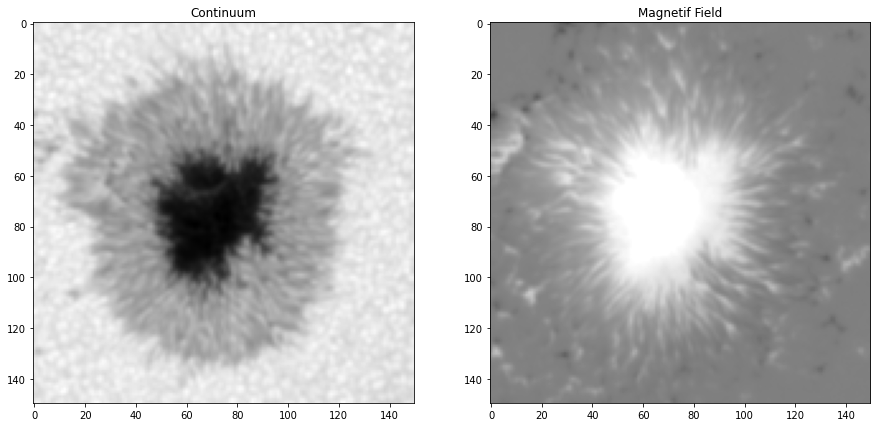

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,15))

# Line plots
ax1.set_title('Continuum')
ax1.imshow(cutting(getdata(cont)).data, cmap='gray')
#ax1.set_ylim(0,1)
ax2.set_title('Magnetif Field')
ax2.imshow(cutting(getdata(magn)).data, cmap='gray', vmin=-1500, vmax=1500)
#plt.savefig('sub',dpi=300)

#### Step 3

In [ ]:
magnetic = cutting(getdata(magn))
magnetic = magnetic.data
magnetic = magnetic.flatten()


conti = cutting(getdata(cont))
conti = conti.data
conti = conti.flatten()

In [ ]:
histogram = plt.hist(magnetic, bins='auto', color = 'darkcyan')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 7)
plt.title('Histogram of Magnetic Field', size = 14)
plt.ylabel('Number of Counts', size = 14)
plt.xlabel('Magnetic Flux Density', size = 14)
plt.grid()
#plt.savefig('hist_magn',dpi=300)
plt.show()

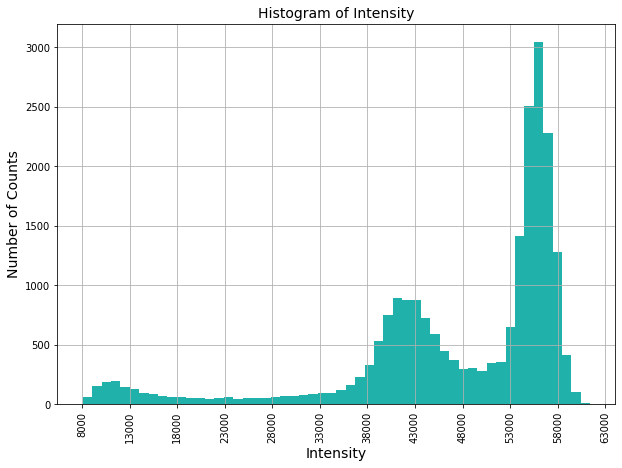

In [ ]:
histogram = plt.hist(conti, bins='auto', color = 'lightseagreen')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 7)
plt.title('Histogram of Intensity', size = 14)
plt.grid()
plt.ylabel('Number of Counts', size = 14)
plt.xlabel('Intensity', size = 14)
plt.xticks(np.arange(8000, 65000, 5000))
plt.xticks(rotation = 90, fontsize = 10)
#plt.savefig('hist_conti',dpi=300)
plt.show()

In [ ]:
print('Maximum value of margenitc field is '+ str(max(magnetic)))
print('Minimim value of margenitc field is '+ str(min(magnetic)))

Maximum value of margenitc field is 2275.3
Minimim value of margenitc field is -641.8


#### Step 5

In [ ]:
conti = cutting(getdata(cont))
conti = conti.data

magnetic = cutting(getdata(magn))
magnetic = magnetic.data

In [ ]:
umbra = np.zeros((150,150))

for i in range(len(conti)):
    for j in range(len(conti)):
        if conti[i][j] <= 20000:
            umbra[i][j] = 1
        else:
            umbra[i][j] = 0

In [ ]:
umbra_penumbra = np.zeros((150,150))

for i in range(len(conti)):
    for j in range(len(conti)):
        if conti[i][j] > 50000:
            umbra_penumbra[i][j] = 0
        else:
            umbra_penumbra[i][j] = 1

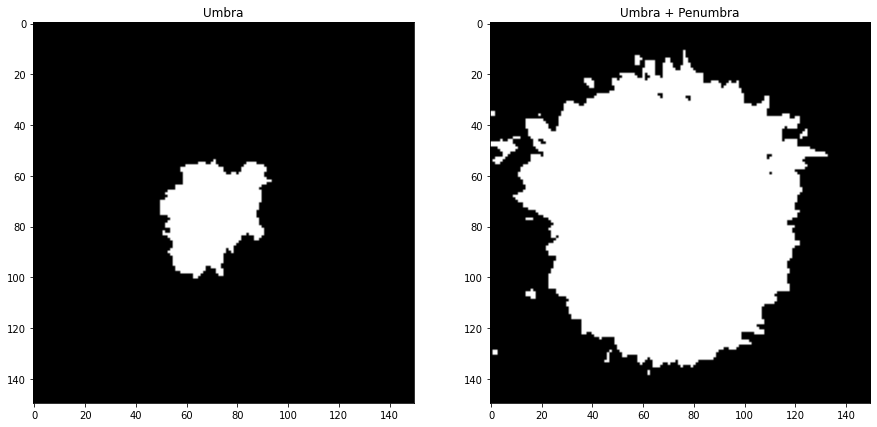

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,15))

# Line plots
ax1.set_title('Umbra')
ax1.imshow(umbra, cmap='gray')

ax2.set_title('Umbra + Penumbra')
ax2.imshow(umbra_penumbra, cmap='gray')
#plt.savefig('mask',dpi=300)
plt.show()

#### Step 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: The following kwargs were not used by contour: 'label'
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: The following kwargs were not used by contour: 'label'
  if __name__ == '__main__':
No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'label'
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'label'
No handles with labels found to put in legend.


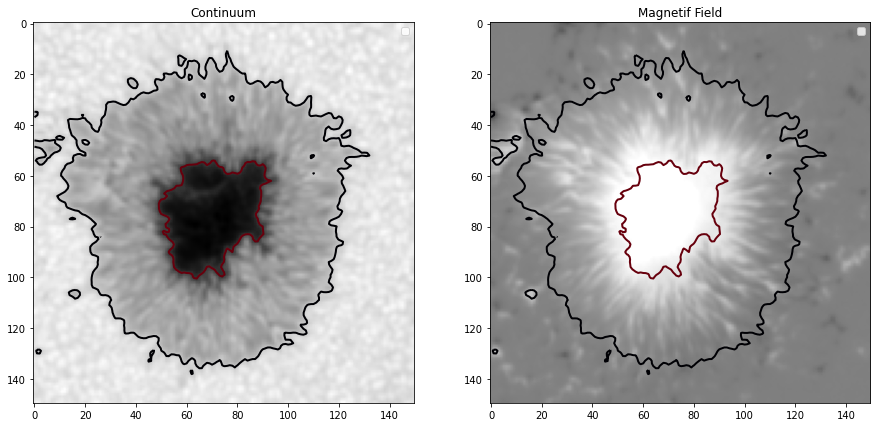

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,15))

# Line plots
ax1.set_title('Continuum')
ax1.imshow(cutting(getdata(cont)).data, cmap='gray')
levels = (8000,20000)  # Define contour levels to use
ax1.contour(cutting(getdata(cont)).data, cmap='Reds', alpha=1, levels=levels, linewidths = 2, label = 'umbra')
levels = (50000, 100000)  # Define contour levels to use
ax1.contour(cutting(getdata(cont)).data, cmap='inferno', alpha=1, levels=levels, linewidths = 2, label = 'penumbra')
ax1.legend()

#ax1.set_ylim(0,1)
ax2.set_title('Magnetif Field')
ax2.imshow(cutting(getdata(magn)).data, cmap='gray', vmin=-1500, vmax=1500)
levels = (2000,20000)  # Define contour levels to use
ax2.contour(cutting(getdata(cont)).data, cmap='Reds', alpha=1, levels=levels, linewidths = 2, label = 'umbra')
levels = (50000, 100000)  # Define contour levels to use
ax2.contour(cutting(getdata(cont)).data, cmap='inferno', alpha=1, levels=levels, linewidths = 2, label = 'penumbra')
ax2.legend()
#fig.tight_layout()
#plt.savefig('controur', dpi=300)
plt.show()

#### Step 6

In [ ]:
conti = cutting(getdata(cont))
conti = conti.data

magnetic = cutting(getdata(magn))
magnetic = magnetic.data

In [ ]:
umbra = []
penumbra = []
quite = []
for i in range(len(conti)):
    for j in range(len(conti)):
        if conti[i][j] <= 20000:
            umbra.append(magnetic[i][j])
        elif 20000 < conti[i][j] < 50000:
            penumbra.append(magnetic[i][j])
        else:
            quite.append(magnetic[i][j])

In [ ]:
#number of pixels in each region
pix_umbra = (len(umbra))
print(pix_umbra)
pix_penum = (len(penumbra))
print(pix_penum)
pix_quite = (len(quite))
print(pix_quite)

1327
8600
12573


In [ ]:
umbra_magn_mean = np.mean(umbra)
penumbra_magn_mean = np.mean(penumbra)
quite_magn_mean = np.mean(quite)

In [ ]:
#mean magnetic fiels
print('Mean magnetic fields for umbra, penubra and quite Sun are:')
print(umbra_magn_mean)
print(penumbra_magn_mean)
print(quite_magn_mean)

Mean magnetic fields for umbra, penubra and quite Sun are:
1639.7279
505.19186
36.42425


### Step 7

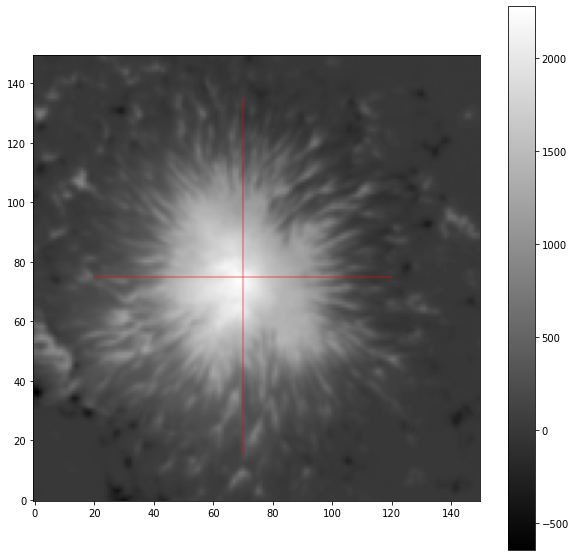

In [ ]:
plt.imshow(cutout.data, origin='lower', cmap='gray')
fig = matplotlib.pyplot.gcf()
plt.vlines(70, 15, 135, alpha = 0.4, color = 'red')
plt.hlines(75, 20, 120, alpha = 0.4, color = 'red')
fig.set_size_inches(10, 10)
plt.colorbar()

plt.show()

In [ ]:
cdelt1 = hdu.header['CDELT1']
cdelt2 = hdu.header['CDELT2']
rsun_obs = hdu.header['RSUN_OBS']

In [ ]:
# obtain km per pixel
rsun_km = 696340
km_per_sec = rsun_km / rsun_obs
km_pix = (km_per_sec * cdelt1)**2
km_pix

129631.47827320048

In [ ]:
print('The sunspot diameter is '
      +str(round((120 * km_per_sec * cdelt1))) 
      + ' km')

In [ ]:
print('The sunspot diameter is ' +
      str(round((120 * km_per_sec * cdelt1)/12742,2)) +
      ' bigger than Earth diameter')

In [ ]:
km_umbra = pix_umbra * km_pix
km_penum = pix_penum * km_pix
km_quite = pix_quite * km_pix

In [ ]:
print('Umbra is about ' + str(round(km_umbra)) + ' square kilometers')
print('Penumbra is about ' + str(round(km_penum)) + ' square kilometers')
print('Quite is about ' + str(round(km_quite)) + ' square kilometers')

In [ ]:
sunspot_pix = pix_penum + pix_umbra
sunspot_km = sunspot_pix * km_pix

In [ ]:
#earth
km_earth = np.pi * 6371**2

In [ ]:
print('The sunspot area is ' +
      str(round((sunspot_km/km_earth),2)) +
      ' bigger than Earth cross-sectional area')